## Practice Questions

This notebook contains practise questions for the assess coursework on the 19th of March. I will upload some model answers in a later lecture. If you can answer all of these questions, then you shouldn't have too much trouble in the coursework.

Please use the ‘litho_log’ data available in the data folder of this repository to complete these exercises.

### Exercise 1 (Approx. 15 mins)

You have been given some data that contains a large number of observations of downhole logs and the name of the lithologies associated with the log response.
 - 'DEPTH_WMSF': the depth of the measurement below seafloor 
 - 'HCGR': Total gamma ray counts 
 - 'HFK': Potassium counts 
 - 'HTHO': Thorium counts 
 - 'HURA': Uranium counts 
 - 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity 
 - 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity 
 - 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity 
 - 'lithology': our target value, a string representing the name of the lithology
 
Using a Markdown cell, describe the steps that you would take to clean this data and prepare it for machine learning analysis.

### Write your answer here (in this Markdown cell)

1 - read data using pandas

2 - drop duplicates

3 - split data into train/test

4 - remove negative values

5 - train imputer/scaler

6 - transform train/test using imputer/scaler

### Exercise 2 (25 minutes)

Load the data set and drop any duplicates you find.

Then answer the following questions:

 - What is the distribution of the lithologies in this dataset?
 - What is the average depth of the interbedded clay and mud?
 - Among the samples found at or below 400m (below seafloor), what are the characteristics of the samples with the five highest Uranium counts?

In [25]:
import pandas as pd

# to read and make dataframe
df = pd.read_csv('Data/litho_log_data.csv')

# remove duplicates in original df
df.drop_duplicates(inplace=True)

# Show summary of the dataframe
df.describe()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
count,12679.000000,12670.000000,12672.000000,12670.000000,12676.000000,12676.000000,12669.000000,12675.000000
mean,240.188858,40.273614,1.093900,6.507539,1.525871,298.732181,336.555715,501.254062
std,167.801979,20.481547,0.613088,3.121844,0.815444,697.334446,714.193282,2145.676964
min,0.072400,0.029500,-0.070000,-0.136600,-0.510500,0.339900,0.285100,0.091500
25%,104.474800,23.601925,0.593450,4.002075,0.893850,1.197275,1.102000,0.632100
50%,212.976400,43.776500,1.144300,7.122450,1.533650,1.337950,1.245200,0.750500
75%,342.892400,55.553225,1.558500,8.796875,2.061750,2.067400,2.067400,1.068650
max,821.981200,93.633400,2.793700,16.031500,5.351800,1950.000000,1950.000000,9700.000000


,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
3380,630.1096,32.7248,0.8065,5.7713,0.2698,1.1611,0.6496,0.5852,Marl
3603,665.1616,9.1622,0.2776,1.3127,0.2798,0.5008,0.3059,0.3190,Sandy Mud
3602,665.0092,10.1429,0.2828,1.5968,0.3642,0.5397,0.3418,0.2803,Sandy Mud
3608,665.9236,7.8863,0.1173,1.8418,0.3718,0.4824,0.3355,0.3569,Sandy Mud
3609,666.0760,7.5719,0.1156,1.7510,0.3751,0.5096,0.3633,0.2982,Sandy Mud
...,...,...,...,...,...,...,...,...,...
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl


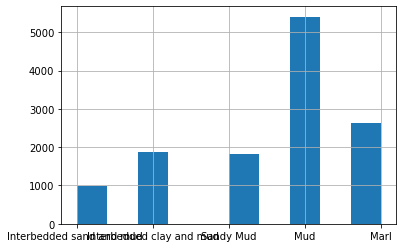

In [53]:
# What is the distribution of the lithologies in this dataset?
df['lithology'].hist()

# What is the average depth of the interbedded clay and mud?


# Among the samples found at or below 400m (below seafloor), what are the characteristics of the samples with the five highest Uranium counts?
filtered_df = df[df['DEPTH_WMSF'] >=400]
filtered_df.sort_values(by='HURA')

### Exercise 3.1 (10 minutes)

Using the steps you outlined in Exercise 1, split this dataset into a training set and a testing set (with reasonable names). 

In [19]:
from sklearn.model_selection import train_test_split

# Create train set and test set
train_set, test_set = train_test_split(df, train_size=0.7, random_state = 30)

### Exercise 3.2 (20 minutes)

Examine the training set. Are there any missing or unusual values in any of the columns? What are these values and in which columns can they be found? Use a Markdown cell to describe your findings.

In [20]:
# Show summary of the dataframe
train_set.describe()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
count,8875.000000,8873.000000,8869.000000,8866.000000,8872.000000,8872.000000,8870.000000,8873.000000
mean,239.917989,40.345287,1.096111,6.517235,1.526731,298.998122,338.841923,504.723878
std,167.719605,20.549861,0.615247,3.131012,0.816099,697.715393,716.750710,2152.732593
min,0.072400,0.029500,-0.066400,-0.136600,-0.510200,0.339900,0.285100,0.091500
25%,104.550400,23.605300,0.590800,4.010275,0.885900,1.198675,1.102400,0.632400
50%,211.924000,43.952700,1.145800,7.140800,1.543000,1.342800,1.244850,0.751600
75%,342.656000,55.752900,1.561700,8.827200,2.063950,2.066975,2.067075,1.068800
max,821.828800,91.675000,2.793700,16.031500,5.351800,1950.000000,1950.000000,9700.000000


In [21]:
# Find NaN values in train set
train_set.isna().sum()

DEPTH_WMSF    0
HCGR          2
HFK           6
HTHO          9
HURA          3
IDPH          3
IMPH          5
SFLU          2
lithology     0
dtype: int64

## Exercise 3.3 (10 minutes)

Replace any unusual values with `np.nan`. 

In [27]:
import numpy as np



-0.0664

## Exercise 4 (30 mins)

Create a pipeline with an `Imputer`, a `Scaler`, and a `DecisionTreeClassifier`. Set the `random_state` of the `DecisionTreeClassifier` to 42.

Create and run a RandomizedSearchCV on three hyperparameters of your choice using `accuracy` as the metric of choice (use `n_iter = 20`). Explain what varying each of your selected hyperparameters will do to your model.

Print out the accuracy and parameters of your best model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

my_pipeline = Pipeline([
        ('imputer', SimpleImputer()), 
        ('std_scaler', MinMaxScaler()),
        ('classifier', DecisionTreeClassifier())
    ])



## Exercise 5 (10 mins)

Explain why accuracy may not be the best metric for assessing the performance of a classifier model.

Describe three other classification metrics and the scenarios in which they would be useful.